In [1]:
#change the directory to the original file location
import os
new_directory=r'C:\Users\vladimir.shpilkin\Desktop\Learning\Python-Projects\LA_Crime'
os.chdir(new_directory)
print('New directory is',os.getcwd())

New directory is c:\Users\vladimir.shpilkin\Desktop\Learning\Python-Projects\LA_Crime


In [2]:
import pandas as pd
import numpy as np


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
crime_data='Crime_Data_from_2020_to_Present.csv'
crime_data_df=pd.read_csv(crime_data)

<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Cleaning the Data
    </span>
</div>

In [5]:
crime_data_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
#checking the missing values percentage per column
(round(crime_data_df.isnull().sum()/len(crime_data_df),2)*100).sort_values(ascending=False)

Crm Cd 4          100.0
Crm Cd 3          100.0
Crm Cd 2           93.0
Cross Street       84.0
Weapon Used Cd     65.0
Weapon Desc        65.0
Mocodes            14.0
Vict Sex           13.0
Vict Descent       13.0
DR_NO               0.0
LAT                 0.0
LOCATION            0.0
Crm Cd 1            0.0
Status Desc         0.0
Status              0.0
Premis Cd           0.0
Premis Desc         0.0
Date Rptd           0.0
Vict Age            0.0
Crm Cd Desc         0.0
Crm Cd              0.0
Part 1-2            0.0
Rpt Dist No         0.0
AREA NAME           0.0
AREA                0.0
TIME OCC            0.0
DATE OCC            0.0
LON                 0.0
dtype: float64

In [7]:
#cleaning the dataset from the unnecessary columns
crime_data_filtered_df=crime_data_df.drop(columns=['Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street','Part 1-2','Crm Cd','Mocodes','Weapon Used Cd','Weapon Desc'])
crime_data_filtered_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820594,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,12500 BRANFORD ST,34.2466,-118.4054
820595,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,102.0,SIDEWALK,IC,Invest Cont,12800 FILMORE ST,34.2790,-118.4116
820596,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,222.0,LAUNDROMAT,IC,Invest Cont,6100 S VERMONT AV,33.9841,-118.2915
820597,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,PICKPOCKET,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,500 S MAIN ST,34.0467,-118.2485


In [8]:
crime_data_filtered_df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Vict Age,Premis Cd,LAT,LON
count,8.205990e+05,820599.000000,820599.000000,820599.000000,820599.000000,820589.000000,820599.000000,820599.000000
mean,2.161299e+08,1335.627492,10.711722,1117.592487,29.806031,305.759386,33.604765,-116.725860
std,1.083045e+07,654.020941,6.093656,609.360686,21.776511,216.670080,3.970446,13.786369
min,8.170000e+02,1.000000,1.000000,101.000000,-3.000000,101.000000,0.000000,-118.667600
25%,2.102046e+08,900.000000,6.000000,621.000000,7.000000,101.000000,34.010200,-118.428700
50%,2.201176e+08,1415.000000,11.000000,1142.000000,31.000000,203.000000,34.057500,-118.319300
75%,2.220056e+08,1900.000000,16.000000,1617.000000,45.000000,501.000000,34.161600,-118.273100
max,2.399165e+08,2359.000000,21.000000,2199.000000,120.000000,976.000000,34.334300,0.000000


In [9]:
#checking the data types
crime_data_df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [10]:
#converting to the needed datetime format
crime_data_df['DATE OCC'] = pd.to_datetime(crime_data_df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
crime_data_df['Date Rptd'] = pd.to_datetime(crime_data_df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')

In [11]:
#checking the changes
crime_data_df.dtypes

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object

In [12]:
#unique amount of the areas
len(set(crime_data_filtered_df['AREA NAME']))

21

In [13]:
#find out the area with the most crimes committed
crime_pivot=pd.pivot_table(crime_data_filtered_df,values='DR_NO',index=['AREA NAME'],aggfunc=len).sort_values(by='DR_NO',ascending=False).reset_index()

In [14]:
crime_pivot.index+=1

<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Determining High Crime Areas
    </span>
</div>


In [15]:
crime_pivot.rename(columns={'AREA NAME':'Area Name','DR_NO':'Crimes Count'})

,Area Name,Crimes Count
1,Central,55209
2,77th Street,51853
3,Pacific,48003
4,Southwest,45957
5,Hollywood,43474
6,Southeast,41854
7,Olympic,41435
8,Newton,41139
9,N Hollywood,40768
10,Wilshire,38962


<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Crimes Count by Year
    </span>
</div>


In [16]:
crimes_dict={}
crimes_dict_agg={}


values=crime_data_filtered_df['DR_NO']
keys=pd.to_datetime(crime_data_filtered_df['DATE OCC']).dt.year

for i in range(len(keys)):
    key=keys[i]
    value=values[i]
    
    if key not in crimes_dict:
        crimes_dict[key]=[]
        
    crimes_dict[key].append(value)
    
for year,crimes_count in crimes_dict.items():
    crimes_dict_agg[year]=len(crimes_count)

crimes_dict_agg

C:\Users\vladimir.shpilkin\AppData\Local\Temp\ipykernel_14116\2804794501.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  keys=pd.to_datetime(crime_data_filtered_df['DATE OCC']).dt.year


{2020: 199409, 2021: 209353, 2022: 234227, 2023: 177610}

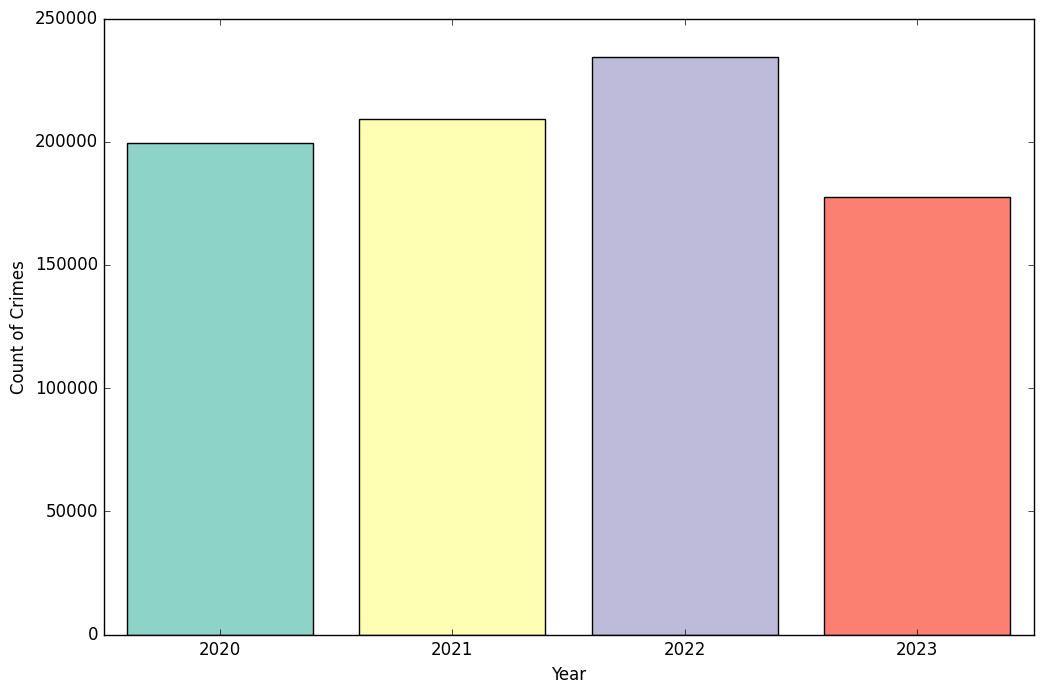

In [17]:
from datetime import datetime
fig = plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.style.use('classic')

x_values = [datetime(year, 1, 1).year for year in crimes_dict_agg.keys()]  # Extract only the years
y_values = crimes_dict_agg.values()
color_palette = sns.color_palette("Set3", len(y_values))

plt.bar(x_values, y_values, color=color_palette)
plt.xlabel('Year')
plt.ylabel('Count of Crimes')

# Set the x-axis tick labels to display only the years
plt.xticks(x_values, [int(year) for year in x_values])

plt.show()


<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Average Age of the Victims
    </span>
</div>

In [18]:
#dropping the irrelevant values
crime_data_filtered_df.drop(crime_data_filtered_df[crime_data_filtered_df['Vict Age']<1].index,axis=0,inplace=True)
crime_data_filtered_df.drop(crime_data_filtered_df[pd.isnull(crime_data_filtered_df['Vict Sex'])].index,inplace=True)

In [19]:
victims_age=crime_data_filtered_df.groupby('Vict Sex')['Vict Age'].mean().sort_values(ascending=False).reset_index()
round(victims_age,1)

,Vict Sex,Vict Age
0,M,40.8
1,F,38.7
2,H,38.2
3,X,24.2


<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Incidents Count by Gender
    </span>
</div>

In [20]:
count_of_crimes_per_sex_type=crime_data_filtered_df.groupby('Vict Sex')['DR_NO'].count().sort_values(ascending=False).reset_index()
count_of_crimes_per_sex_type.rename(columns={"Vict Sex":"Victim Sex","DR_NO":"Crimes Count"})

,Victim Sex,Crimes Count
0,M,311606
1,F,298853
2,X,7425
3,H,88


<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Number of Crimes Based on Victim's Ethnicity
    </span>
</div>

In [21]:
crime_data_filtered_df_desc=crime_data_filtered_df

In [22]:
set(crime_data_filtered_df['Vict Descent'])

{'-',
 'A',
 'B',
 'C',
 'D',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'O',
 'P',
 'S',
 'U',
 'V',
 'W',
 'X',
 'Z',
 nan}

In [23]:
#change the abbreviations to the full word
for desc in crime_data_filtered_df_desc['Vict Descent']:
    if desc=="W":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='W',value='White',inplace=True)
    elif desc=="H":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='H',value='Hispanic/Latin/Mexican',inplace=True)
    elif desc=="A":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='A',value='Other Asian',inplace=True)
    elif desc=="F":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='F',value='Filipino',inplace=True)
    elif desc=="G":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='G',value='Guamanian',inplace=True)
    elif desc=="I":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='I',value='American Indian/Alaskan Native',inplace=True)
    elif desc=="J":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='J',value='Japanese',inplace=True)
    elif desc=="K":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='K',value='Korean',inplace=True)
    elif desc=="L":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='L',value='Laotian',inplace=True)
    elif desc=="O":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='O',value='Other',inplace=True)
    elif desc=="P":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='P',value='Pacific Islander',inplace=True)
    elif desc=="S":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='S',value='Samoan',inplace=True)
    elif desc=="U":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='U',value='Hawaiian',inplace=True)
    elif desc=="V":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='V',value='Vietnamese',inplace=True)
    elif desc=="X":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='X',value='Unknown',inplace=True)
    elif desc=="Z":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='Z',value='Asian Indian',inplace=True)
    elif desc=="B":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='B',value='Black',inplace=True)
    elif desc=="C":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='C',value='Chinese',inplace=True)
    elif desc=="D":
        crime_data_filtered_df_desc['Vict Descent'].replace(to_replace='D',value='Cambodian',inplace=True)
    

In [24]:
#checking anything missing
missing=[]
for x in crime_data_filtered_df_desc['Vict Descent']:
    x=str(x)
    if len(x)==1:
        missing.append(x)

        
print(set(missing))


{'-'}


In [25]:
crime_data_filtered_df_desc

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,BATTERY - SIMPLE ASSAULT,36,F,Black,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,BATTERY - SIMPLE ASSAULT,25,M,Hispanic/Latin/Mexican,102.0,SIDEWALK,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,White,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,Unknown,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,"RAPE, FORCIBLE",25,F,Hispanic/Latin/Mexican,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820594,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,Hispanic/Latin/Mexican,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,12500 BRANFORD ST,34.2466,-118.4054
820595,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic/Latin/Mexican,102.0,SIDEWALK,IC,Invest Cont,12800 FILMORE ST,34.2790,-118.4116
820596,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,Black,222.0,LAUNDROMAT,IC,Invest Cont,6100 S VERMONT AV,33.9841,-118.2915
820597,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,PICKPOCKET,24,F,Hispanic/Latin/Mexican,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,500 S MAIN ST,34.0467,-118.2485


In [26]:
victims_descent_df=crime_data_filtered_df_desc.groupby('Vict Descent')['DR_NO'].count().sort_values(ascending=False).reset_index()
victims_descent_df.index+=1

In [27]:
victims_descent_df

,Vict Descent,DR_NO
1,Hispanic/Latin/Mexican,247560
2,White,155259
3,Black,115597
4,Other,54349
5,Other Asian,17659
6,Unknown,12939
7,Korean,4347
8,Filipino,3397
9,Chinese,3138
10,Japanese,1139


In [28]:
victims_descent_df.rename(columns={'Vict Descent':'Victim Descent','DR_NO':'Accidents Count'})

,Victim Descent,Accidents Count
1,Hispanic/Latin/Mexican,247560
2,White,155259
3,Black,115597
4,Other,54349
5,Other Asian,17659
6,Unknown,12939
7,Korean,4347
8,Filipino,3397
9,Chinese,3138
10,Japanese,1139


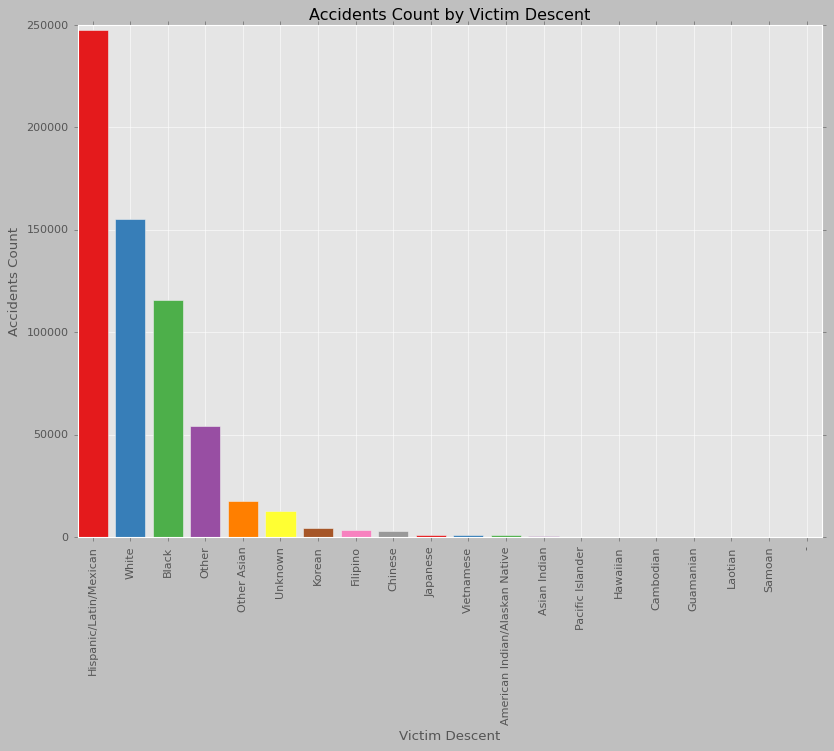

In [29]:
# Create a color palette based on unique values in 'Vict Descent'
unique_descent_values = victims_descent_df['Vict Descent'].unique()
c = sns.color_palette("Set1", len(unique_descent_values))

# Create the bar plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.style.use('ggplot')
plt.bar(victims_descent_df['Vict Descent'], victims_descent_df['DR_NO'], color=c)

plt.xlabel('Victim Descent')
plt.ylabel('Accidents Count')
plt.title('Accidents Count by Victim Descent')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Crime Types Analysis
    </span>
</div>

In [30]:
crime_data_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820594,231604807,2023-01-27,2023-01-26,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
820595,231606525,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
820596,231210064,2023-04-12,2023-04-12,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
820597,230115220,2023-07-02,2023-07-01,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [31]:
crime_types_count=crime_data_df.groupby('Crm Cd Desc')['DR_NO'].size().sort_values(ascending=False).reset_index()
crime_types_count=crime_types_count.rename(columns={'Crm Cd Desc':'Crime Type','DR_NO':'Crimes Count'})
crime_types_count_top=crime_types_count.head(20)
crime_types_count_top.index+=1
crime_types_count_top

,Crime Type,Crimes Count
1,VEHICLE - STOLEN,87888
2,BATTERY - SIMPLE ASSAULT,65360
3,THEFT OF IDENTITY,51944
4,BURGLARY FROM VEHICLE,50275
5,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",50019
6,BURGLARY,49955
7,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",47235
8,THEFT PLAIN - PETTY ($950 & UNDER),41704
9,INTIMATE PARTNER - SIMPLE ASSAULT,41355
10,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),31696


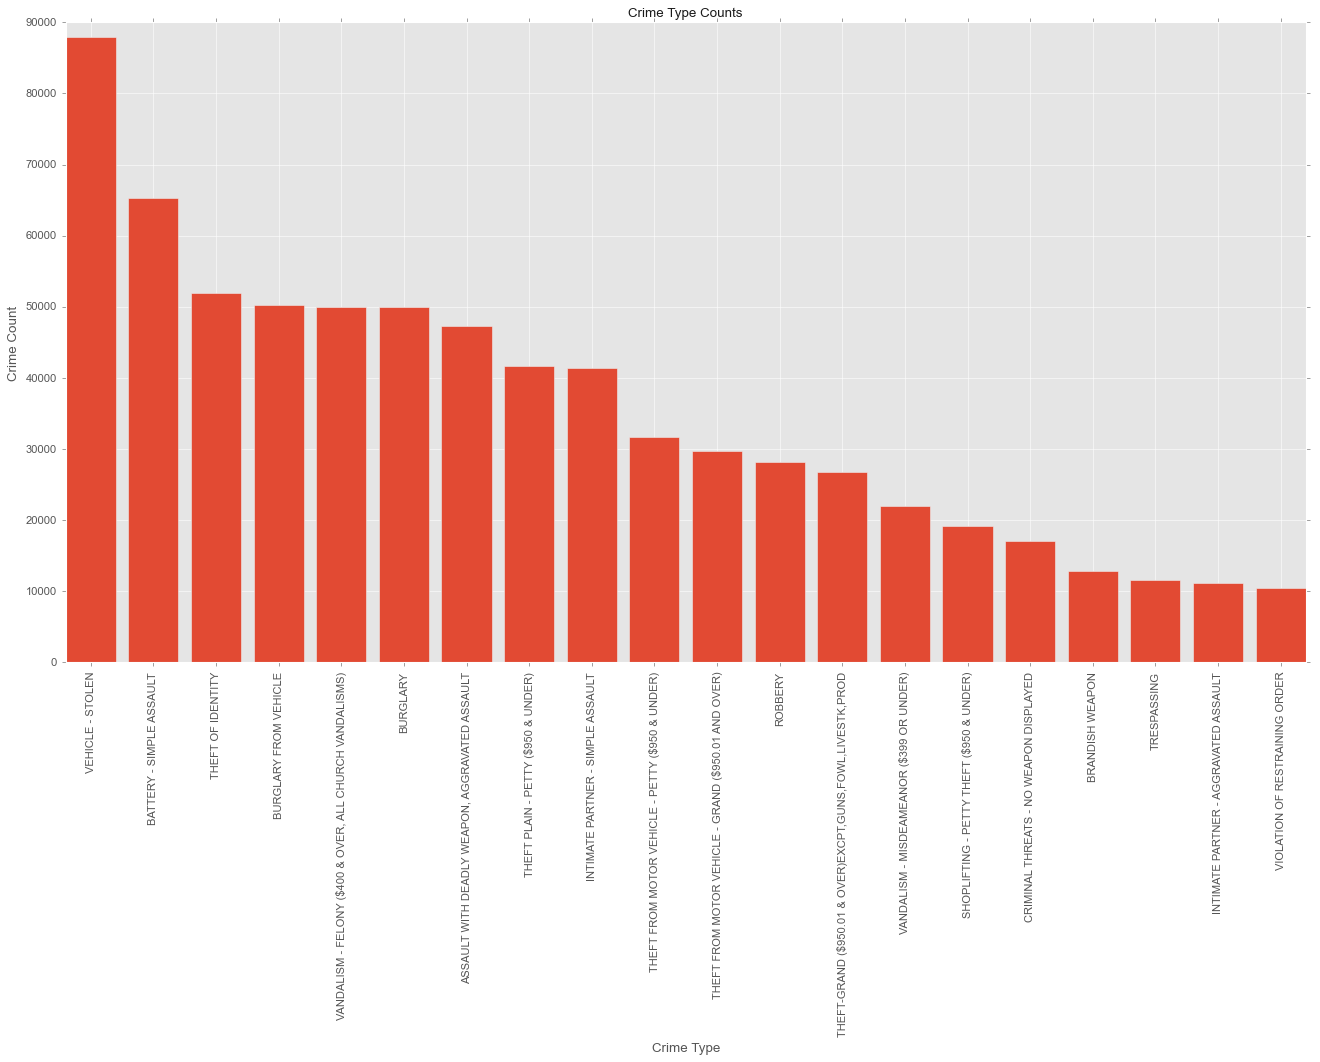

In [32]:
fig=plt.figure(figsize=(20,10))
x_values=crime_types_count_top['Crime Type']
y_values=crime_types_count_top['Crimes Count']

plt.bar(x_values,y_values)
plt.style.use('classic')
sns.set(style="whitegrid")

plt.title('Crime Type Counts')
plt.xlabel('Crime Type')
plt.ylabel('Crime Count')

plt.xticks(rotation=90)

plt.show()

<div style="display: flex; justify-content: center; align-items: center; height: 100%;">
    <span style="color: black; font-family: 'Times New Roman'; font-size: 30px;">
        Crime Time & Trends
    </span>
</div>

In [33]:
crime_data_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820594,231604807,2023-01-27,2023-01-26,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
820595,231606525,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
820596,231210064,2023-04-12,2023-04-12,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
820597,230115220,2023-07-02,2023-07-01,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


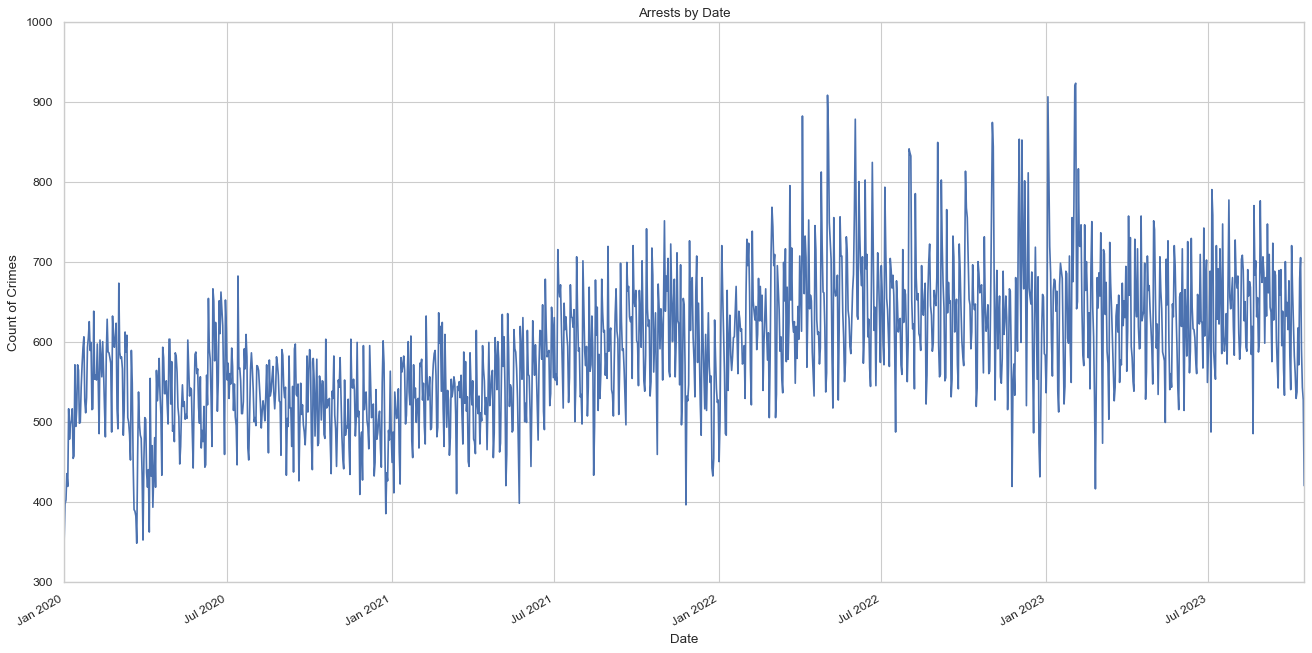

In [34]:
#building a stacked chart to see the count of arrests per date

fig=plt.figure(figsize=(20,10))
plt.style.use('classic')
sns.set(style="whitegrid")


(crime_data_df
 
.groupby('Date Rptd')
.size()
.sort_values(ascending=False)
.plot(title='Arrests by Date')
.set(xlabel='Date',ylabel='Count of Crimes')

)

plt.show()

In [138]:
import folium
from folium.plugins import HeatMap
import geopy
import branca.colormap as branca_folium_cm

In [111]:
#get the list of coordinates
coordinates=crime_data_df[["LAT", "LON"]]
#map
map_obj=folium.Map(location=[34.0522, -118.2437],zoom_start=12)


HeatMap(coordinates).add_to(map_obj)
map_obj.save("output.html")

In [150]:
#get the list of coordinates
coordinates2=crime_data_df[["LAT", "LON"]]
#map
map_obj2=folium.Map(location=[34.0522, -118.2437],zoom_start=12)
heatmap_pivot=pd.pivot_table(crime_data_df,values='DR_NO',index=coordinates2,aggfunc='count').reset_index()
radius = 100
HeatMap(heatmap_pivot,blur=30).add_to(map_obj2)
map_obj2